In [2]:
%matplotlib inline
import scipy.special, cmath
import random, math, pylab, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
import mpl_toolkits.mplot3d

In [3]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

# Feynman path integral

## Real time evolution via the Trotter approximation

In order to study the real time evolution of a quantum system, we need to revert to the description using wave functions, and the Schrodinger equation $i \dfrac{\partial}{\partial t} \psi(t) = H  \psi(t)$, where $H$ is the Hamiltonian of the system. This equation can be formally solved as $\psi(t) = \exp(-i t H) \psi_0$. In this form, $exp(-i t H)$ appears as a time-evolution operator. Moreover, the substitution $it \to \beta$, i.e., the use of "imaginary time", transforms this time-evolution operator into the density matrix operator. This formal similarity allows us to draw a parallel between the results established in equilibrium as a function of inverse temperature, and the time evolution of the system. In particular, the results related to the Trotter expansion can be expanded

This time, we can decompose the full time interval $[0, \ldots, t]$ into steps of size $\Delta t = t / N$, to obtain $$ \exp(-itH) = \prod\limits_{k=1}^{N}\exp(-i \Delta t H) = \prod\limits_{k=1}^{N}\exp(-i \Delta t (H^{\text{free}} + V(x))$$

Now, application of the Trotter decomposition, with $\beta \to i\Delta t$, leads to $$\exp(-i \Delta t (H^{\text{free}} + V(x)) = \exp(-i \frac{\Delta t}{2} V)  \exp(-i \Delta t H^{\text{free}}) \exp(-i \frac{\Delta t}{2} V) + \mathcal{O}(\Delta t^3)$$

After handling the middle term in momentum space, we find that $\exp(-i \Delta t H^{\text{free}}) \hat{\psi}(p, t) = \exp(-i \Delta t \frac{p^2}{2}) \hat{\psi}(p, t)$. With this, we are able to devise an algorithm for the determination of the time-evolution of the system, as implemented below.

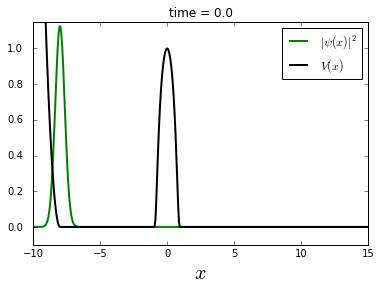

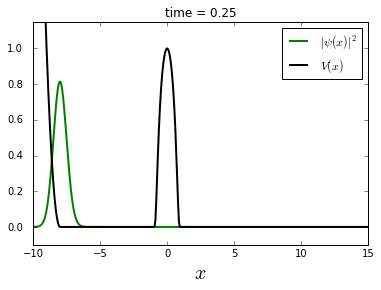

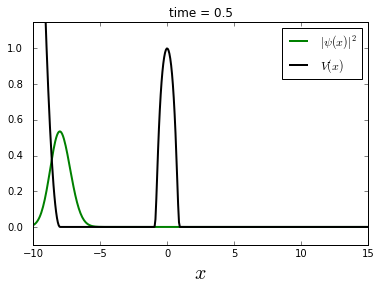

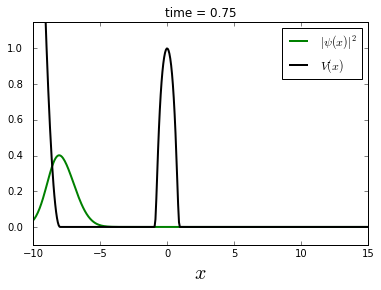

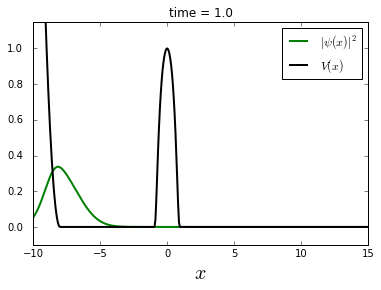

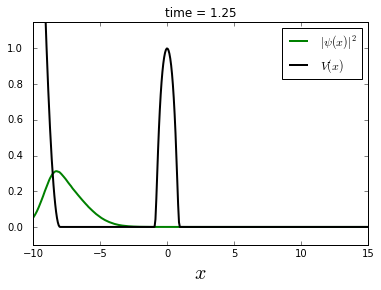

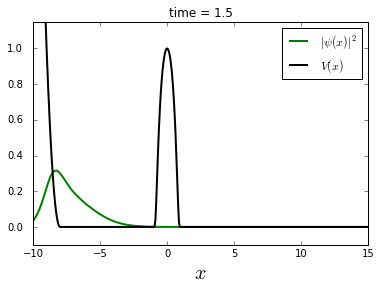

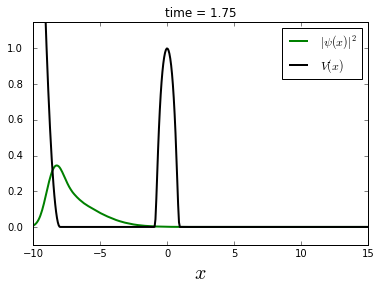

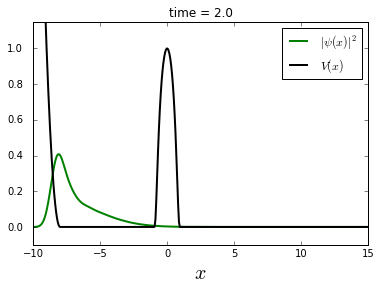

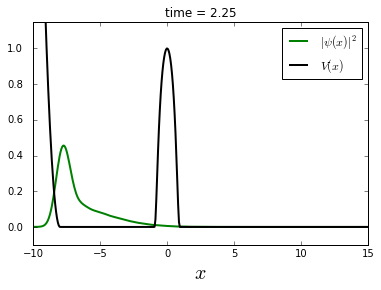

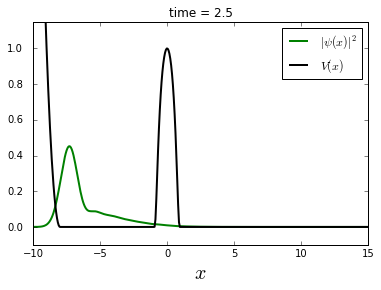

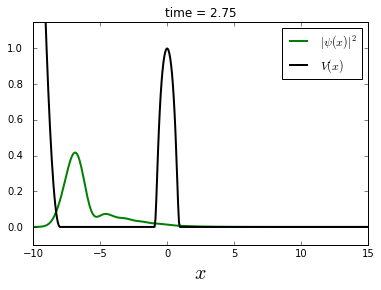

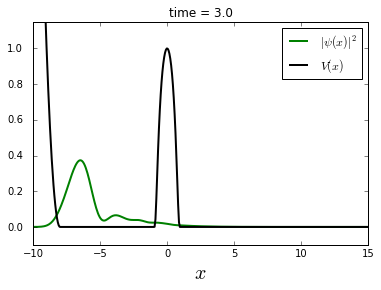

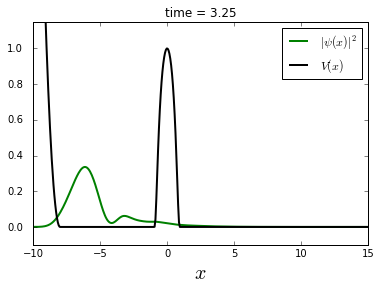

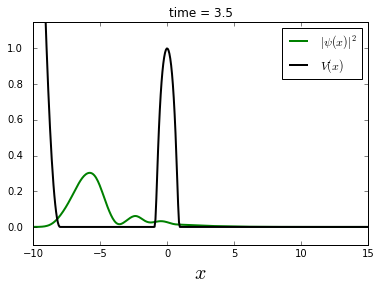

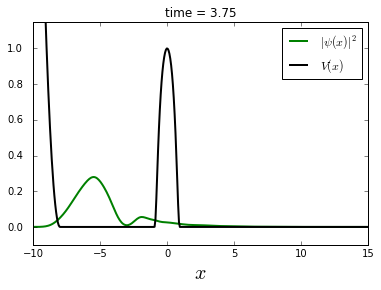

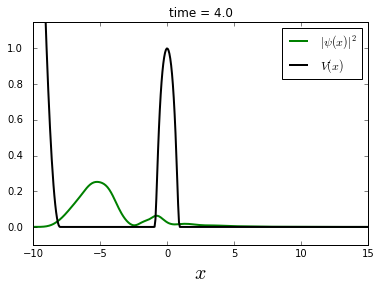

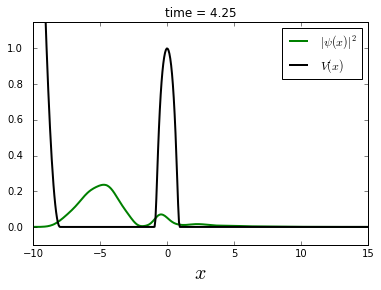

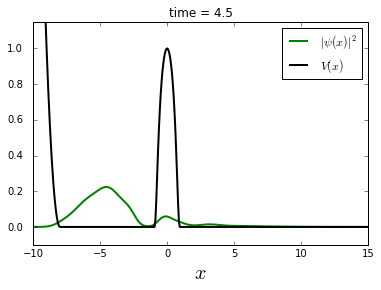

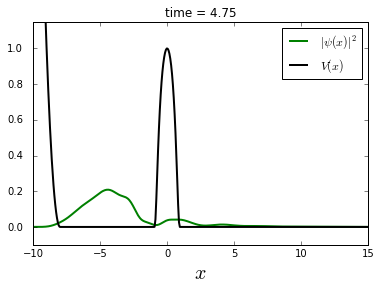

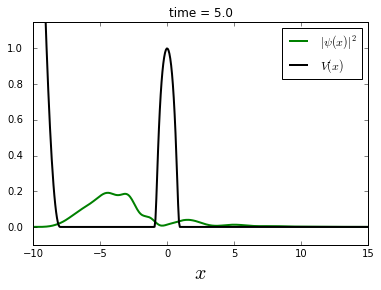

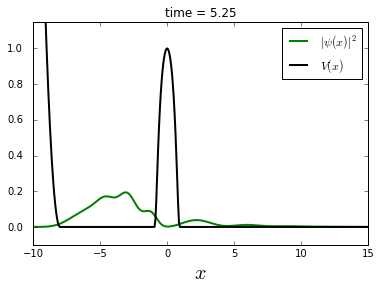

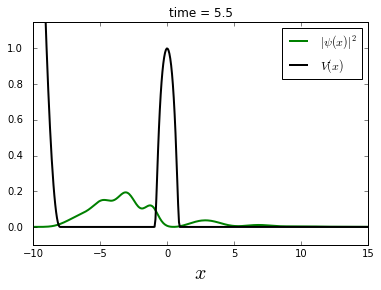

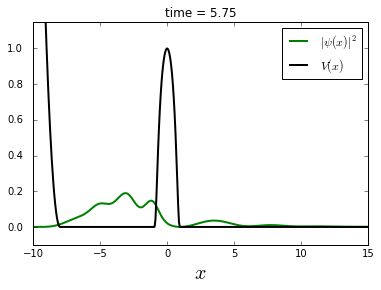

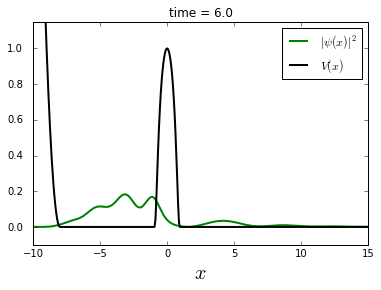

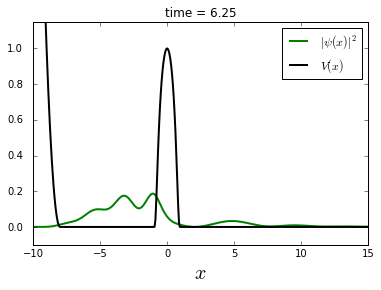

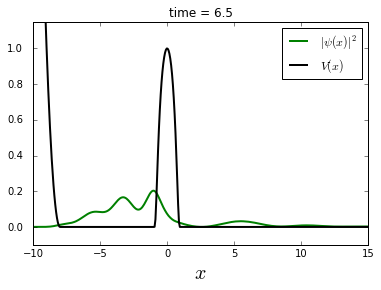

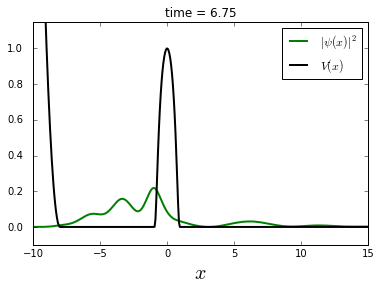

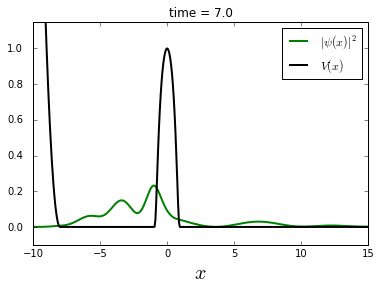

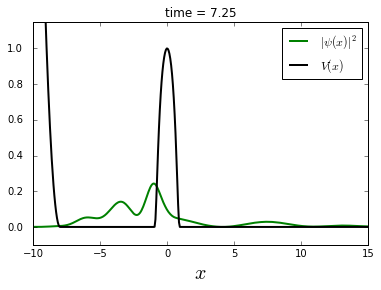

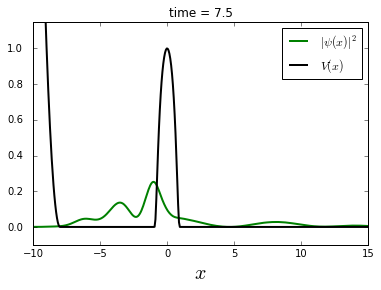

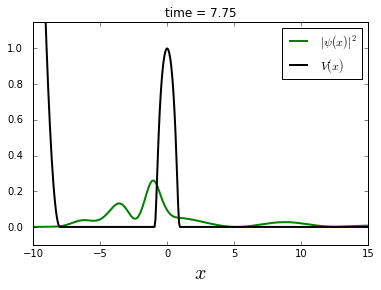

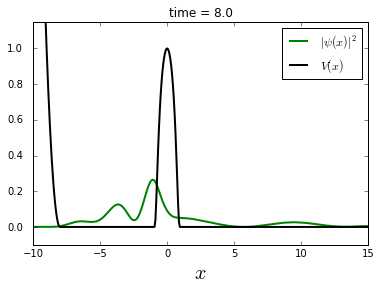

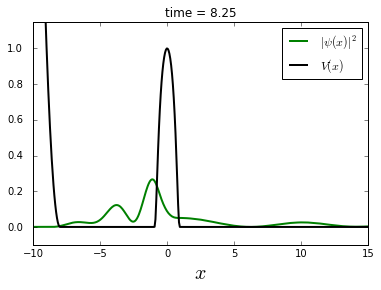

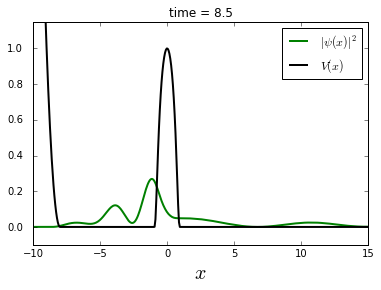

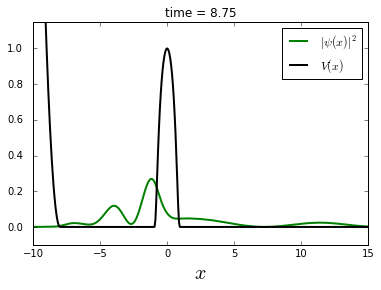

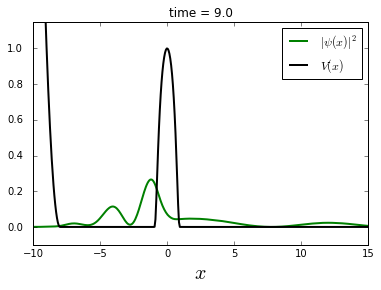

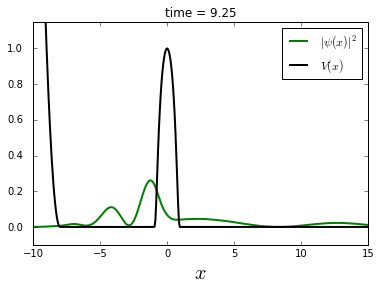

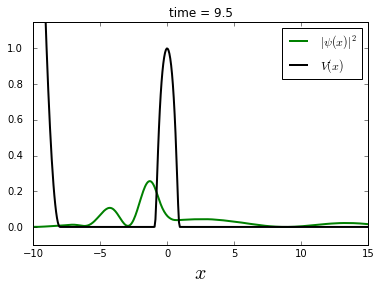

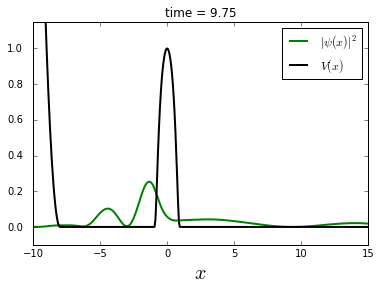

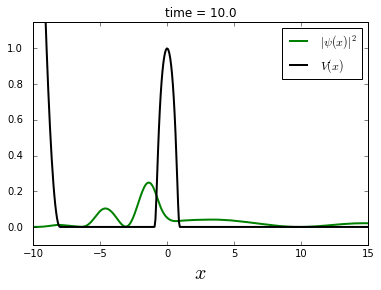

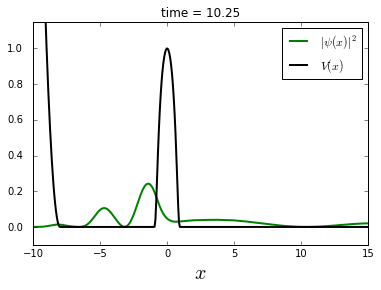

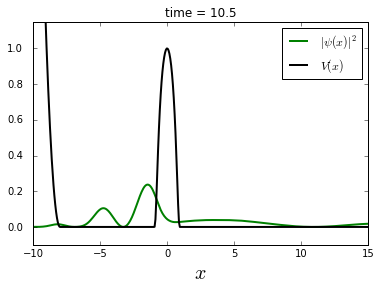

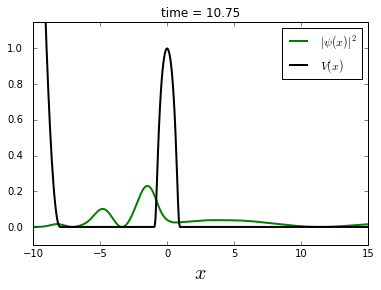

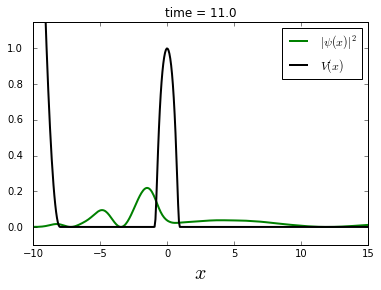

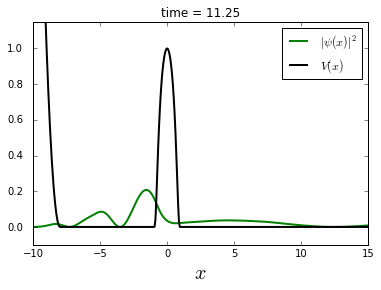

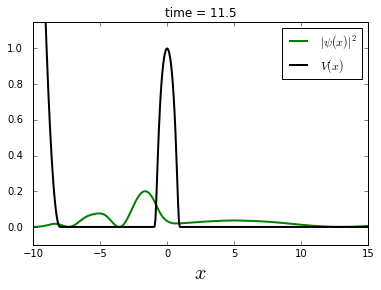

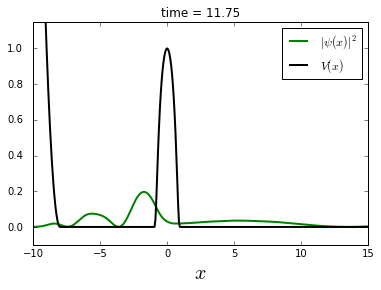

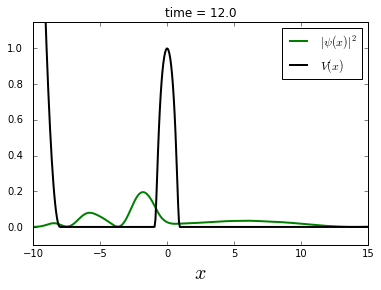

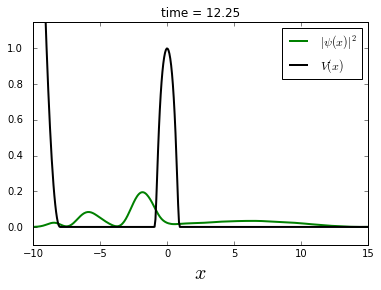

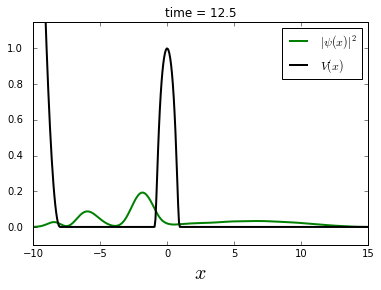

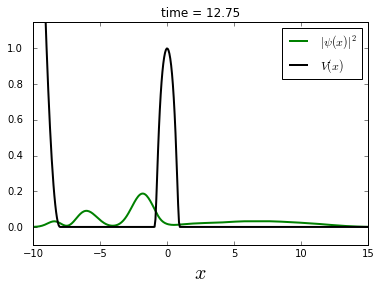

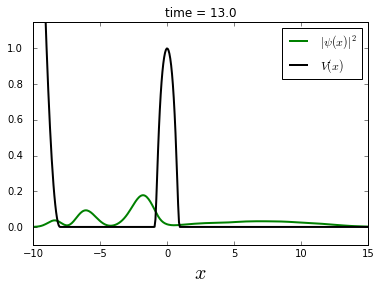

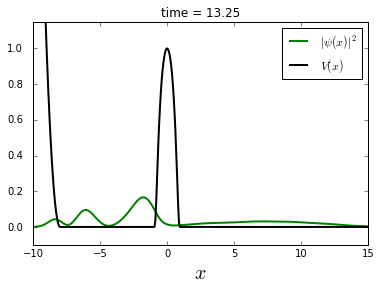

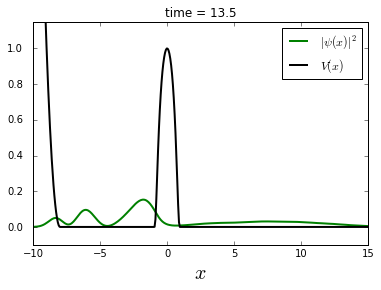

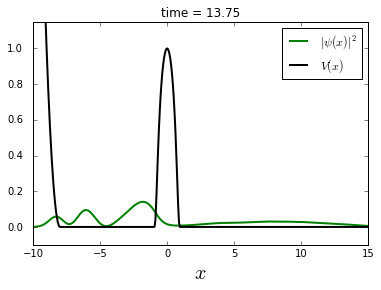

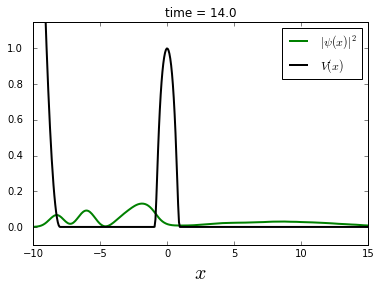

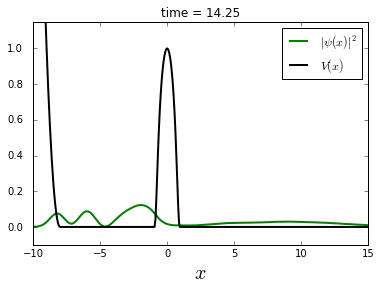

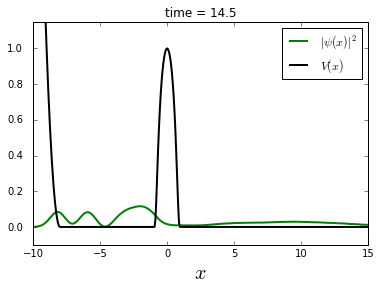

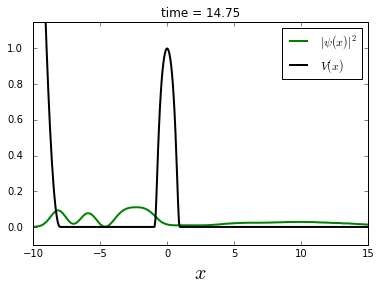

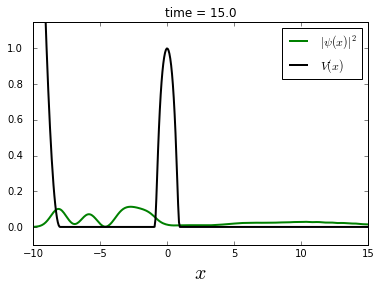

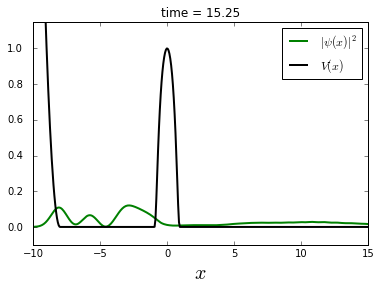

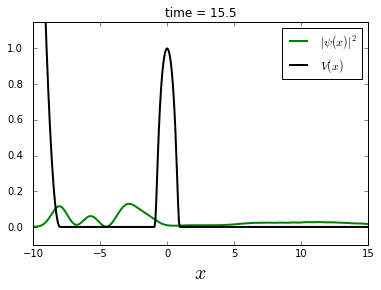

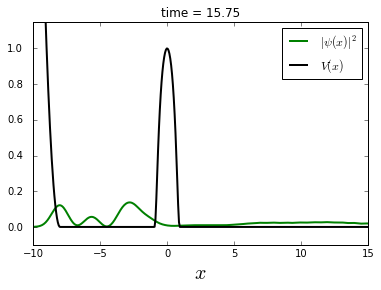

16.0


In [4]:
def fourier_x_to_p(phi_x, dx):
    phi_p = [(phi_x * np.exp(-1j * p * grid_x)).sum() * dx for p in grid_p]
    return np.array(phi_p)

def fourier_p_to_x(phi_p, dp):
    phi_x = [(phi_p * np.exp(1j * x * grid_p)).sum() * dp for x in grid_x]
    return np.array(phi_x) /  (2.0 * np.pi)

def time_step_evolution(psi0, potential, grid_x, grid_p, dx, dp, delta_t):
    psi0 = np.exp(-1j * potential * delta_t / 2.0) * psi0
    psi0 = fourier_x_to_p(psi0, dx)
    psi0 = np.exp(-1j * grid_p ** 2 * delta_t / 2.0) * psi0
    psi0 = fourier_p_to_x(psi0, dp)
    psi0 = np.exp(-1j * potential * delta_t / 2.0) * psi0
    return psi0

def funct_potential(x):
    if x < -8.0:    return (x + 8.0) ** 2
    elif x <= -1.0: return 0.0
    elif x < 1.0:   return np.exp(-1.0 / (1.0 - x ** 2)) / np.exp(-1.0)
    else:           return 0.0

output_dir = 'snapshots_time_evolution'
if not os.path.exists(output_dir): os.makedirs(output_dir)
def show(x, psi, pot, time, timestep):
    pylab.plot(x, psi, 'g', linewidth = 2.0, label = '$|\psi(x)|^2$')
    pylab.xlim(-10, 15)
    pylab.ylim(-0.1, 1.15)
    pylab.plot(x, pot, 'k', linewidth = 2.0, label = '$V(x)$')
    pylab.xlabel('$x$', fontsize = 20)
    pylab.title('time = %s' % time)
    pylab.legend(loc=1)
    pylab.savefig(output_dir + '/snapshot_%05i.png' % timestep)
    timestep += 1
    pylab.show()
    pylab.clf()

steps = 800
x_min = -12.0
x_max = 40.0
grid_x = np.linspace(x_min, x_max, steps)
grid_p = np.linspace(x_min, x_max, steps)
dx  = grid_x[1] - grid_x[0]
dp  = grid_p[1] - grid_p[0]
delta_t = 0.05
t_max = 16.0

potential = [funct_potential(x) for x in grid_x]
potential = np.array(potential)
# initial state:
x0 = -8.0
sigma = .5
psi = np.exp(-(grid_x - x0) ** 2 / (2.0 * sigma ** 2) )
psi /= np.sqrt( sigma * np.sqrt( np.pi ) )
# time evolution
time = 0.0
timestep = 0
while time < t_max:
    if timestep % 5 == 0:
        show(grid_x, np.absolute(psi) ** 2.0, potential, time, timestep)
    time += delta_t
    timestep += 1
    psi = time_step_evolution(psi, potential, grid_x, grid_p, dx, dp, delta_t)
print time

## Levy sampling for free particle

In [5]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

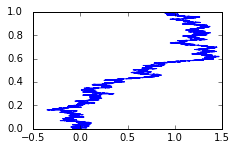

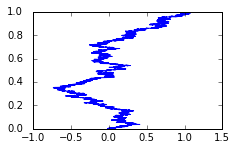

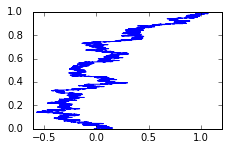

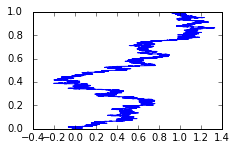

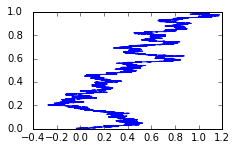

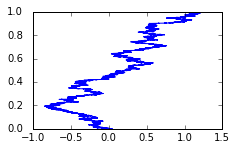

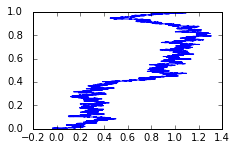

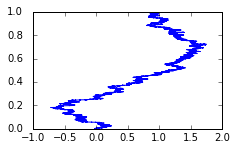

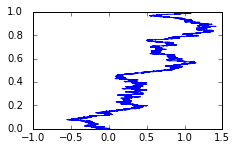

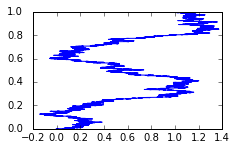

In [6]:
beta = 1.0
N = 50000                       # number of steps in imaginary time
dtau = beta / N                 # elementary time step in imaginary time
nsteps = 10                     # number of paths to be generated
xstart, xend = 0.0, 1.0         # initial and final points

for step in range(nsteps):
    x = [xstart]
    for k in range(1, N):        # loop over internal slices
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    x.append(xend)

    fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
    ax.plot(x, np.linspace(0, 1, num=N + 1, endpoint=True))